<a href="https://colab.research.google.com/github/myconcordia/INSE6220/blob/main/Tutorial4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Python Modules**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Linear Regression
------------
**Using stats.linregress**

In [3]:
X = np.array([419, 239, 279, 430, 669, 399, 598, 339, 395, 294, 295, 575, 228, 170, 349])
y = np.array([400, 200, 265, 399, 671, 393, 580, 315, 363, 290, 277, 520, 223, 165, 342])
beta1hat, beta0hat, r_value, p_value, std_err = stats.linregress(X, y)
print('beta0hat = {0:.2f}, beta1hat = {1:.2f}'.format(beta0hat, beta1hat))
print('r_value = {0:.3f}, r_squared = {1:.3f}'.format(r_value, r_value**2))

beta0hat = -11.03, beta1hat = 0.98
r_value = 0.994, r_squared = 0.988


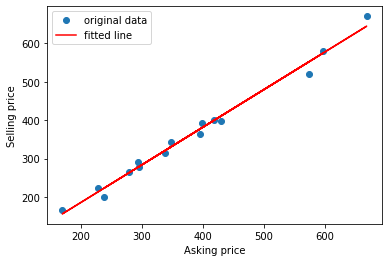

In [4]:
plt.plot(X, y, 'o', label='original data')
plt.plot(X, beta0hat + beta1hat*X, 'r', label='fitted line')
plt.xlabel('Asking price')
plt.ylabel('Selling price')
plt.legend()
plt.show()

**Using pandas & ols**

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1086.
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           6.50e-14
Time:                        02:10:32   Log-Likelihood:                -61.777
No. Observations:                  15   AIC:                             127.6
Df Residuals:                      13   BIC:                             129.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.0287     11.996     -0.919      0.3

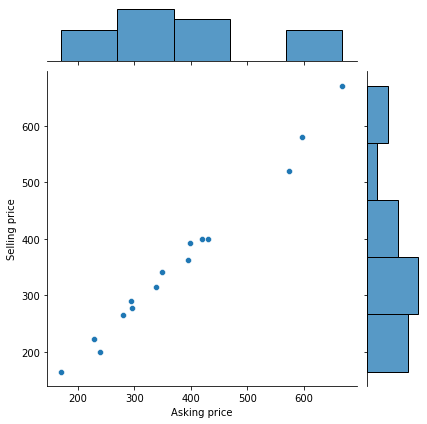

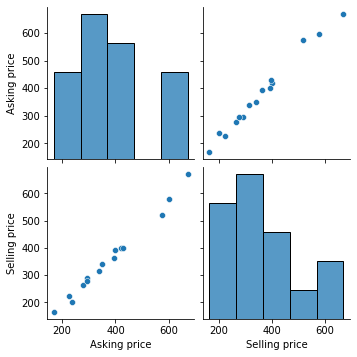

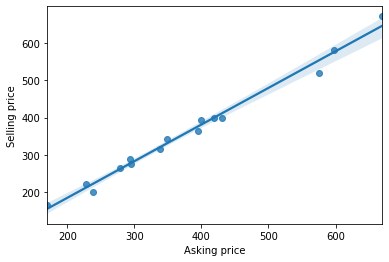

In [5]:
data = np.column_stack((X, y))
df = pd.DataFrame(data, columns=['Asking price', 'Selling price'])
df.describe()
sns.jointplot(x='Asking price',y='Selling price',data=df)
sns.pairplot(df)
#Create a linear model plot Selling price vs Asking price
#sns.lmplot(x='Asking price',y='Selling price',data=df)
plt.figure()
sns.regplot(x='Asking price',y='Selling price', data=df, fit_reg=True)

# Fit the model
formula = 'y ~ X'
model = ols(formula, df).fit()
# Print the summary
print(model.summary())

**Peform analysis of variance on fitted linear model**

In [6]:
table = anova_lm(model)
print('\nANOVA table')
print(table)


ANOVA table
            df         sum_sq        mean_sq            F        PR(>F)
X          1.0  277178.384852  277178.384852  1085.986303  6.501966e-14
Residual  13.0    3318.015148     255.231934          NaN           NaN


**Hypothesis testing**

In [7]:
f0 = 1085.98
n = len(X)
alpha = 0.05
#ppf (Percent point function)
f_alpha = stats.f.ppf(1-alpha, 1, n-2)
print('alpha = {0:.2f}, f_alpha = {1:.2f}'.format(alpha, f_alpha))

alpha = 0.05, f_alpha = 4.67


**Retrieve the parameter estimates**

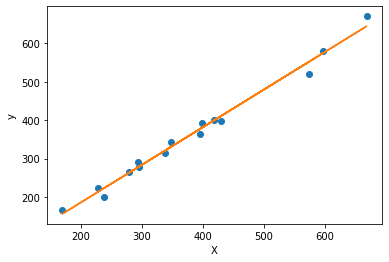

In [8]:
beta0, beta1 = model._results.params
plt.figure()
plt.plot(X, y, 'o')
yhat = beta0 + X*beta1
plt.plot(X, yhat)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

**Residual plot**

Text(0, 0.5, 'Residuals')

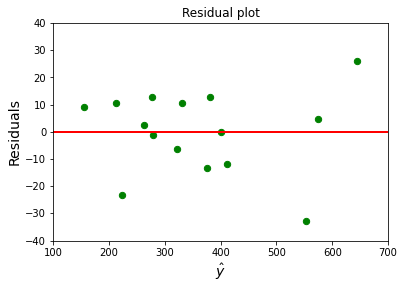

In [9]:
plt.figure()
plt.scatter(yhat, y - yhat, c='g', s = 40)
plt.hlines(y=0, xmin=100, xmax=700, colors ="r", linewidth=2)
plt.gca().set_xlim(left=100, right=700)
plt.ylim(-40, 40)
plt.title('Residual plot')
plt.xlabel('$\hat{y}$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

Analysis of Variance (ANOVA)
------------
**one-way ANOVA**

In [10]:
from scipy.stats import f, f_oneway

In [11]:
data = np.array([[7,  8, 15, 11,  9, 10],
                [12, 17, 13, 18, 19, 15],
                [14, 18, 19, 17, 16, 18],
                [19, 25, 22, 23, 18, 20]])
a, n = np.shape(data)
m = a*n

SSb = (sum([sum(row) ** 2 / len(row) for row in data]) - 
              sum([sum(row) for row in data]) ** 2 / m)

SSt = (sum([value ** 2 for row in data for value in row]) - 
           sum(value for row in data for value in row) ** 2 / m)

SSw = SSt - SSb

F0 = (SSb/(a-1)) / (SSw/(a*(n-1))) 
p_val = f.sf(F0, a-1, a*(n-1))  # always right-tailed 
print('F0 = {0:.3f}, p-value = {1:.3f}, '.format(F0, p_val))

F0 = 19.605, p-value = 0.000, 


**One-way ANOVA using SciPy**

F0 = 19.605, p-value = 0.000, 
                SS  df       MS        F
Factor  382.791667   3  127.597  19.6052
Error   130.166667  20  6.50833      NaN
Total   512.958333  23      NaN      NaN
               A          B          C          D
count   6.000000   6.000000   6.000000   6.000000
mean   10.000000  15.666667  17.000000  21.166667
std     2.828427   2.804758   1.788854   2.639444
min     7.000000  12.000000  14.000000  18.000000
25%     8.250000  13.500000  16.250000  19.250000
50%     9.500000  16.000000  17.500000  21.000000
75%    10.750000  17.750000  18.000000  22.750000
max    15.000000  19.000000  19.000000  25.000000


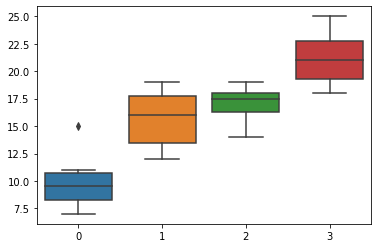

In [12]:
F0, p_val = f_oneway(*data)
print('F0 = {0:.3f}, p-value = {1:.3f}, '.format(F0, p_val))

df_b = a-1
df_w = a*(n-1)
df_t = a*n-1
MSb = SSb/df_b
MSw = SSw/df_w

results = {'SS':[SSb, SSw, SSt], 'df':[df_b, df_w, df_t], 
           'MS':[MSb, MSw, 'NaN'], 'F':[F0, 'NaN', 'NaN']}
col = ['SS', 'df', 'MS', 'F']
aov_table = pd.DataFrame(results, columns=col, index=['Factor', 'Error', 'Total'])
print(aov_table)

data = data.T
df = pd.DataFrame(data, columns = ['A','B','C','D'])
print(df.describe())
sns.boxplot(data=data)

Design of Experiments
------------


In [14]:
from statsmodels.graphics.factorplots import interaction_plot

**Interaction plot**

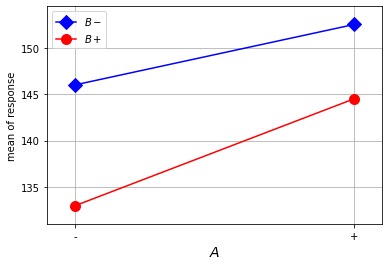

In [15]:
data = np.array([[145, 147], [155, 150], [132, 134], [139, 150]])
n, k = 2, 2
#design matrix
M = np.array([[-1., -1.,  1.],
              [ 1., -1., -1.],
              [-1.,  1., -1.],
              [ 1.,  1.,  1.]])
R = np.tile(M, (n, 1)) #replicate of design matrix
g1 = R[:,0]; g2 = R[:,1]    #factors A and B
y = data.flatten(order='F')
#Interaction plot
interaction_plot(g1, g2, y, colors=['blue','red'], markers=['D','o'], ms=10)
plt.xticks([-1,1],('-', '+'))
plt.xlabel('$A$', fontsize=14)
plt.legend(['$B-$', '$B+$'], loc ='best')
plt.grid(True)

**Fit the model**

In [17]:
formula = 'y ~ C(g1) + C(g2) + C(g1):C(g2)'
df = pd.DataFrame(np.stack((y, g1, g2),-1), columns=['y', 'g1', 'g2'])
model = ols(formula, df).fit()
# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     6.840
Date:                Fri, 16 Apr 2021   Prob (F-statistic):             0.0471
Time:                        02:18:48   Log-Likelihood:                -20.409
No. Observations:                   8   AIC:                             48.82
Df Residuals:                       4   BIC:                             49.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


**Peform ANOVA on fitted linear model**

In [18]:
table = anova_lm(model, typ=2)
print(table)

             sum_sq   df          F    PR(>F)
C(g1)         162.0  1.0   8.415584  0.044075
C(g2)         220.5  1.0  11.454545  0.027671
C(g1):C(g2)    12.5  1.0   0.649351  0.465521
Residual       77.0  4.0        NaN       NaN


**Regression model**

In [20]:
#Grand average
ybarbar = np.sum(np.sum(data,1))/((2**k)*n)
#Totals
S = np.sum(data,1)
#one = S[0]; a = S[1]; b = S[2]; ab = S[3]
#Averages
ybar = np.mean(data,1)
#Main effects
totals = S.T
contrastA = np.dot(totals, M[:,0])
contrastB = np.dot(totals, M[:,1])
contrastAB = np.dot(totals, M[:,2])
A = (contrastA)/(n*2**(k-1))
B = (contrastB)/(n*2**(k-1))
AB = (contrastAB)/(n*2**(k-1))

#Sums of squares
SS_A = n*(A**2)*(2**(k-2))
SS_B = n*(B**2)*(2**(k-2))
SS_AB = n*(AB**2)*(2**(k-2))
SS_T = sum((df.y - ybarbar)**2)
SS_E = SS_T - SS_A - SS_B - SS_AB

#Calculate yhat and the residuals
N = len(data)
yhat = np.zeros((N, 1))    #initialization of yhat
for j in range(N):
  yhat[j] = ybarbar + (A/2)*M[j,0] + (B/2)*M[j,1] #+(AB/2)*M[j,0]*M[j,1]

**Residuals**

In [22]:
residuals = data - yhat  # y - yhat;
error = residuals.flatten('F')  #residuals.ravel('F')

**Normal probability plot**

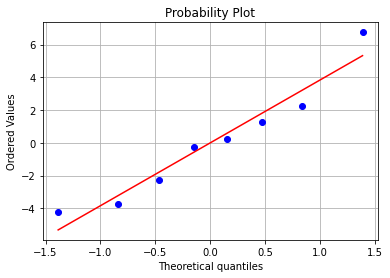

In [24]:
stats.probplot(error, plot=plt)
plt.grid(True)

**Residual plots**

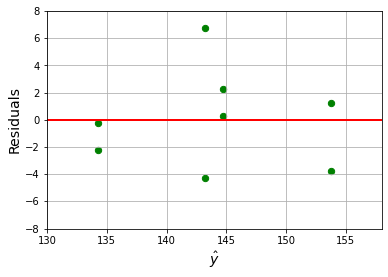

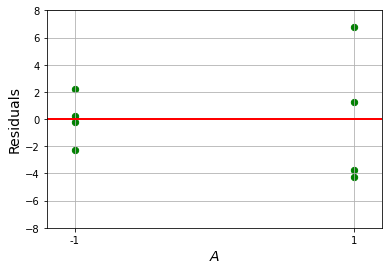

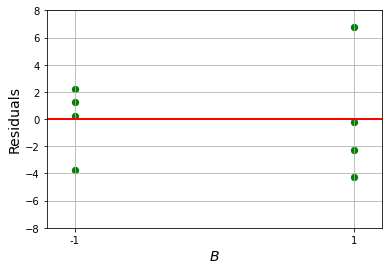

In [25]:
#Residual plot
plt.figure()
plt.scatter(np.tile(yhat, (n, 1)), error, c='g', s = 40)
plt.hlines(y=0, xmin=130, xmax=158, colors ="r", linewidth=2)
plt.gca().set_xlim(left=130, right=158)
plt.ylim(-8, 8)
plt.xlabel('$\hat{y}$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True)

#Plot the residuals vs. levels of factor A
#Factor: A = M[:,0]
plt.figure()
plt.scatter(g1, error, c='g', s = 40)
plt.hlines(y=0, xmin=-1.2, xmax=1.2, colors ="r", linewidth=2)
plt.gca().set_xlim(left=-1.2, right=1.2)
plt.ylim(-8, 8)
plt.xticks([-1,1],('-1', '1'))
plt.xlabel('$A$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True)

#Plot the residuals vs. levels of factor B
#Factor: B = M[:,1]
plt.figure()
plt.scatter(g2, error, c='g', s = 40)
plt.hlines(y=0, xmin=-1.2, xmax=1.2, colors ="r", linewidth=2)
plt.gca().set_xlim(left=-1.2, right=1.2)
plt.ylim(-8, 8)
plt.xticks([-1,1],('-1', '1'))
plt.xlabel('$B$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True)